In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('./ks-projects-201801.csv/ks-projects-201801.csv')
np.random.seed(0)

In [18]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [21]:
orignal_data = pd.DataFrame(data.usd_goal_real)
scaled_data = minmax_scaling(orignal_data,columns=['usd_goal_real'])

print('Orignal_data \n preview \n',orignal_data.head())
print('minimum value',float(orignal_data.min()),

      '\n maximum value',float(orignal_data.max()))
print('_'*30)
print('Scaled_data \n preview \n',scaled_data.head())
print('minimum value',float(scaled_data.min()),

      '\n maximum value',float(scaled_data.max()))

Orignal_data 
 preview 
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
minimum value 0.01 
 maximum value 166361390.71
______________________________
Scaled_data 
 preview 
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
minimum value 0.0 
 maximum value 1.0


C:\Users\admin\AppData\Local\Temp\ipykernel_14160\1763921825.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('minimum value',float(orignal_data.min()),
C:\Users\admin\AppData\Local\Temp\ipykernel_14160\1763921825.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  '\n maximum value',float(orignal_data.max()))
C:\Users\admin\AppData\Local\Temp\ipykernel_14160\1763921825.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('minimum value',float(scaled_data.min()),
C:\Users\admin\AppData\Local\Temp\ipykernel_14160\1763921825.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  '\n max

In [22]:
#### normalization

In [23]:
index_of_positive = data.usd_pledged_real > 0
print('Number of positive pledged:', np.sum(index_of_positive))

Number of positive pledged: 326134


In [25]:
positive_pledges = data.usd_pledged_real.loc[index_of_positive]
print('Total number of positive pledges:', positive_pledges)

Total number of positive pledges: 1          2421.0
2           220.0
3             1.0
4          1283.0
5         52375.0
           ...   
378656       25.0
378657      155.0
378658       20.0
378659      200.0
378660      524.0
Name: usd_pledged_real, Length: 326134, dtype: float64


In [27]:
print(len(positive_pledges))

326134


In [28]:
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0],
                               name = 'usd_pledged_real',
                               index= positive_pledges.index)

In [30]:
print('orignal_data',positive_pledges.head())
print('minimum value',float(positive_pledges.min()),
                            '\n maximum value',float(positive_pledges.max()))

orignal_data 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
minimum value 0.45 
 maximum value 20338986.27


In [31]:
print("normalized_pledges",normalized_pledges.head())
print('minimum value',float(normalized_pledges.min()),
                            '\n maximum value',float(normalized_pledges.max()))

normalized_pledges 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836852
Name: usd_pledged_real, dtype: float64
minimum value -0.7779954154530838 
 maximum value 30.690537060647134


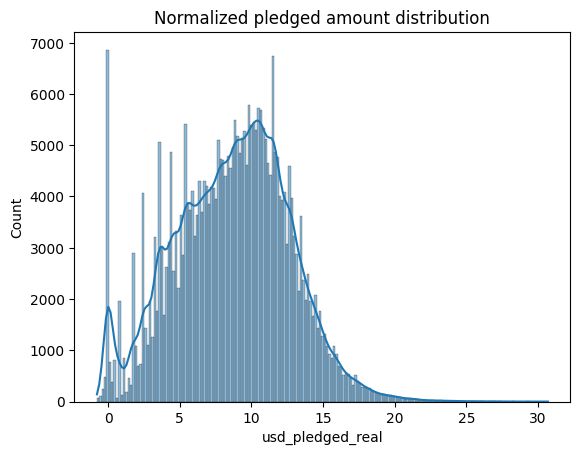

In [32]:
ax = sns.histplot(normalized_pledges, kde=True)
ax.set_title('Normalized pledged amount distribution')
plt.show()